### homework：
- 实现课堂的作业。
-  完成对各列的归一化，再重新建模；
-   对手写体的特征值进行KNN建模

### **homework1**

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data = pd.read_csv('wine.txt', header=None)
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
print(X.shape)

(178, 13)


In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123456)
model = KNeighborsClassifier()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

y_pred = model.predict(X_test) #预测类别标签
y_pred_prob = model.predict_proba(X_test) #预测类别概率
print(classification_report(y_test,y_pred))

0.8333333333333334
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       0.80      0.94      0.86        17
           3       0.75      0.38      0.50         8

    accuracy                           0.83        36
   macro avg       0.82      0.77      0.77        36
weighted avg       0.82      0.83      0.81        36



### **homework2 归一化**
- Min-Max Scaling
- Z-Score Normalization

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
X_minmax_df = pd.DataFrame(X_minmax, columns=X.columns)

X_train1,X_test1,y_train1,y_test1 = train_test_split(X_minmax_df,y,test_size=0.2,random_state=123456)
model = KNeighborsClassifier()
model.fit(X_train1,y_train1)
print(model.score(X_test1,y_test1))

y_pred = model.predict(X_test1) #预测类别标签
y_pred_prob = model.predict_proba(X_test1) #预测类别概率
print(classification_report(y_test1,y_pred))

0.9722222222222222
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      0.94      0.97        17
           3       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [31]:
# Z-Score Normalization
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X)
X_standard_df = pd.DataFrame(X_standard, columns=X.columns)

X_train2,X_test2,y_train2,y_test2 = train_test_split(X_standard_df,y,test_size=0.2,random_state=123456)
model = KNeighborsClassifier()
model.fit(X_train2,y_train2)
print(model.score(X_test2,y_test2))

y_pred = model.predict(X_test2) #预测类别标签
y_pred_prob = model.predict_proba(X_test2) #预测类别概率
print(classification_report(y_test1,y_pred))

0.9722222222222222
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      0.94      0.97        17
           3       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



### **homework3: pendigits**

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data = pd.read_csv('pendigits.txt', header=None)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
print(y.shape)

(7494,)


In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X)
X = pd.DataFrame(X_standard, columns=X.columns)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123456)
model = KNeighborsClassifier()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

y_pred = model.predict(X_test) #预测类别标签
y_pred_prob = model.predict_proba(X_test) #预测类别概率
print(classification_report(y_test,y_pred))

0.9919946631087392
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       142
           1       1.00      0.96      0.98       161
           2       0.97      1.00      0.98       158
           3       0.98      0.99      0.98       175
           4       1.00      1.00      1.00       136
           5       1.00      0.99      1.00       153
           6       1.00      1.00      1.00       133
           7       0.99      1.00      0.99       138
           8       1.00      0.99      1.00       161
           9       0.99      0.99      0.99       142

    accuracy                           0.99      1499
   macro avg       0.99      0.99      0.99      1499
weighted avg       0.99      0.99      0.99      1499



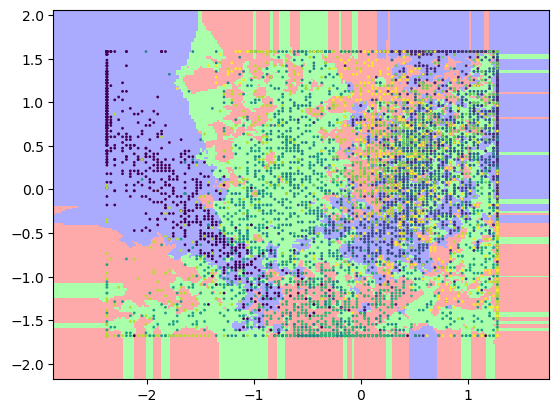

In [58]:
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib.colors import ListedColormap  
from sklearn import datasets  
from sklearn.neighbors import KNeighborsClassifier  
%matplotlib inline

x=X.iloc[:,5:7]   
y=y      

x_min,x_max=x.iloc[:,0].min() -.5, x.iloc[:,0].max()+.5
y_min, y_max=x.iloc[:,1].min()-.5, x.iloc[:,1].max()+.5

cmap_light=ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h=.02
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))  
knn=KNeighborsClassifier()  
knn.fit(x,y)
Z=knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape) 
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y,s=1)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(),yy.max())

plt.show()

### **KNN**
- Step1:使用sklearn自带的iris数据集
- Step2:拆分成训练集和测试集
- Step3:模型训练
- Step4:模型评估
  

In [1]:
import numpy as np 
# Load libraries  
from sklearn import datasets 
from sklearn.neighbors import NearestNeighbors 
from sklearn.preprocessing import StandardScaler  
 
# Load data  
iris = datasets.load_iris() 

In [2]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.6,random_state=123456)

#数据拆分，random_state 结果一样

In [4]:
X_train.shape

(60, 4)

In [5]:
X_train

array([[5.8, 2.7, 4.1, 1. ],
       [7.4, 2.8, 6.1, 1.9],
       [6.1, 2.8, 4.7, 1.2],
       [4.7, 3.2, 1.3, 0.2],
       [6.4, 3.2, 4.5, 1.5],
       [6. , 2.2, 4. , 1. ],
       [5. , 3. , 1.6, 0.2],
       [6.1, 2.6, 5.6, 1.4],
       [5.2, 3.4, 1.4, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [6.8, 2.8, 4.8, 1.4],
       [6. , 2.7, 5.1, 1.6],
       [5.5, 2.3, 4. , 1.3],
       [5.8, 2.7, 5.1, 1.9],
       [5. , 2. , 3.5, 1. ],
       [7.2, 3. , 5.8, 1.6],
       [5.1, 3.5, 1.4, 0.3],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [5.9, 3. , 5.1, 1.8],
       [5. , 3.6, 1.4, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3.4, 1.5, 0.4],
       [6.1, 2.8, 4. , 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [6.3, 2.7, 4.9, 1.8],
       [6.9, 3.1, 4.9, 1.5],
       [6. , 3.4, 4.5, 1.6],
       [6.3, 3.3, 6. , 2.5],
       [6.9, 3.1, 5.1, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.1, 3. , 4.9, 1.8],
       [5.8, 2.6, 4. , 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [5.8, 2

In [6]:
y_train   ##3种类型均等分

array([1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 2, 2, 2, 0, 1,
       0, 1, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 0, 1])

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# 实例化模型并训练  
model = KNeighborsClassifier() #创建实例
model.fit(X_train,y_train)

KNeighborsClassifier()

In [8]:
# 方法1：直接使用模型的score方法计算正确率
print(model.score(X_test,y_test))

# 方法2：使用sklearn.metrics下的classification_report方法
# 先对测试集进行预测
y_pred = model.predict(X_test) #预测类别标签
y_pred_prob = model.predict_proba(X_test) #预测类别概率

# 分类评估报告classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      0.93      0.96        27
           2       0.94      1.00      0.97        31

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



- 准确率（Accuracy）表示分类正确的样本占总样本个数的比例。
- 精确率（Precision）又叫查准率，表示预测结果为正例的样本中实际为正样本的比例。
- 召回率（Recall）又被称为查全率，表示预测结果为正样本中实际正样本数量占全样本中正样本的比例。
- F1 score是精确率和召回率的一个加权平均。

In [9]:
# 查看预测结果
print(y_pred)
print(y_pred_prob[:10])

[0 2 0 1 0 0 2 2 2 0 1 2 2 0 0 2 1 2 1 0 1 2 1 1 1 2 2 2 2 1 0 1 0 1 1 0 1
 0 0 2 1 2 0 0 2 2 1 0 0 0 2 2 0 2 1 2 0 0 2 1 0 1 1 2 0 1 2 2 2 1 0 2 0 0
 0 2 0 0 1 0 1 1 2 0 0 2 1 2 2 2]
[[1.  0.  0. ]
 [0.  0.  1. ]
 [1.  0.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]
 [1.  0.  0. ]
 [0.  0.  1. ]
 [0.  0.  1. ]
 [0.  0.2 0.8]
 [1.  0.  0. ]]


### KNN模型的决策边界

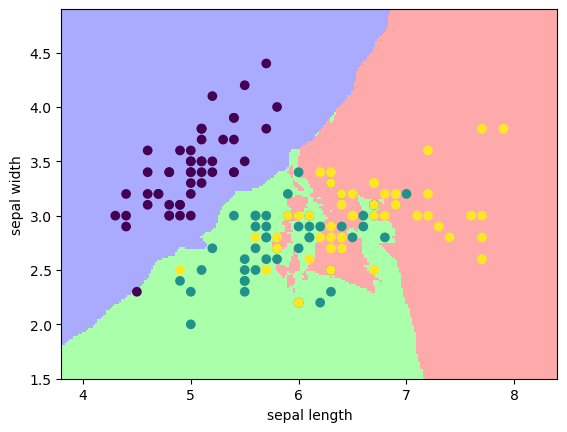

In [10]:
# 使用花萼的长度和宽度绘制散点图，并绘出分类决策边界  
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib.colors import ListedColormap  
from sklearn import datasets  
from sklearn.neighbors import KNeighborsClassifier  
%matplotlib inline

# 为了作图方便，我们只选择花萼的长度和宽度作为X变量
iris=datasets.load_iris( )  
x=iris.data[:,:2]   #选择花萼的长度和宽度(前2个列）作为数据集x
y=iris.target       #数据集y
  
# 计算花萼的长度和宽度的最大值和最小值（散点图的x坐标和y坐标的范围）
x_min,x_max=x[:,0].min() -.5, x[:,0].max()+.5
y_min, y_max=x[:,1].min()-.5, x[:,1].max()+.5

# 自定义三个颜色映射
cmap_light=ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])

# 以0.02为间隔，在xy坐标轴的范围内画网格,形成171*231的网格矩阵
h=.02
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))  

# 用数据集x和y构建逻辑回归模型
knn=KNeighborsClassifier()  
knn.fit(x,y)

# 把xx和yy拉平变成171*231=39501个维度的向量，然后拼接在一起，变成一个39501*2的矩阵，作为数据集X，用模型对它进行类别预测
Z=knn.predict(np.c_[xx.ravel(),yy.ravel()])

# 把Z重新reshape为(171,231)
Z=Z.reshape(xx.shape) 

# 用pcolormesh绘制决策边界：传入参数：网格数据xx,yy以及对应的类别预测结果Z，自定义颜色映射cmap_light，一个颜色区块内代表模型预测的一个类别
plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

# 设置图形的一些基本外观参数
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(),yy.max())

plt.show()

In [16]:
with open("wine.txt", "r", encoding='utf-8') as f:
    data = f.read()
print(type(data))

<class 'str'>


In [17]:
import pandas as pd

data = pd.read_csv('wine.txt', header=None)
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
print(X.shape)
print(type(X))

(178, 13)
<class 'pandas.core.frame.DataFrame'>


In [124]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123456)

from sklearn.neighbors import KNeighborsClassifier

# 实例化模型并训练  
model = KNeighborsClassifier() #创建实例
model.fit(X_train,y_train)

KNeighborsClassifier()

In [125]:
# 方法1：直接使用模型的score方法计算正确率
print(model.score(X_test,y_test))

# 方法2：使用sklearn.metrics下的classification_report方法
# 先对测试集进行预测
y_pred = model.predict(X_test) #预测类别标签
y_pred_prob = model.predict_proba(X_test) #预测类别概率

# 分类评估报告classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


0.8333333333333334
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       0.80      0.94      0.86        17
           3       0.75      0.38      0.50         8

    accuracy                           0.83        36
   macro avg       0.82      0.77      0.77        36
weighted avg       0.82      0.83      0.81        36

